In [166]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from scipy import stats

In [176]:
# load datasets
btc_data = pd.read_csv('BTC-USD.csv')
ndx_data = pd.read_csv('^NDX.csv')
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [177]:
btc_change = (btc_data['Close'] - btc_data['Open']) / btc_data['Close'] * 100
btc_data['btc_pct_change'] = btc_change

ndx_change = (ndx_data['Close'] - ndx_data['Open']) / ndx_data['Close'] * 100
ndx_data['ndx_pct_change'] = ndx_change

# shift 'Close' up by 1 to construct labels:
btc_data['shifted_close'] = btc_data['Close'].shift(-1)
btc_data['label'] = np.where(btc_data['shifted_close'] - btc_data['Close'] > 0, 1, 0)
btc_data = btc_data[(np.abs(stats.zscore(btc_data['btc_pct_change'])) < 3)]
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,btc_pct_change,shifted_close,label
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,0.073362,6985.470215,0
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,-3.107608,7344.884277,1
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,4.907573,7410.656738,1
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.880910,7411.317383,1
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.011681,7769.219238,1


In [178]:
btc_data = btc_data.join(ndx_data.set_index('Date'), on='Date', rsuffix='_ndx')
btc_data = btc_data.dropna(axis=0)

pruned = btc_data.loc[:, ['btc_pct_change', 'ndx_pct_change']]
labels = btc_data.loc[:, 'label']

In [184]:
# split into train and validation
X = pruned.to_numpy()
y = labels.to_numpy()

X_train = X[:500]
X_val = X[500:]

y_train = y[:500]
y_val = y[500:]

In [185]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=10000).fit(X_train)
train_labels = km.labels_

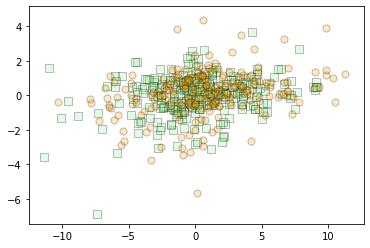

In [186]:
plt.scatter(
    X_train[y_train == 1, 0], X_train[y_train == 1, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1',
    alpha=0.25
)

plt.scatter(
    X_train[y_train == 0, 0], X_train[y_train == 0, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2',
    alpha=0.25
)

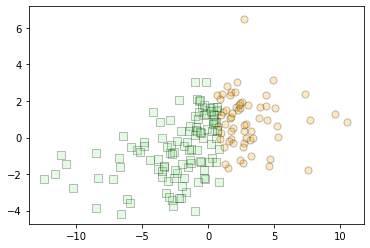

In [187]:
preds_ = km.predict(X_val)

plt.scatter(
    X_val[preds_ == 0, 0], X_val[preds_ == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1',
    alpha=0.25
)

plt.scatter(
    X_val[preds_ == 1, 0], X_val[preds_ == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2',
    alpha=0.25
)

In [189]:
correct = 0
i = 0
for each in preds_:
    if each == y_val[i]:
        correct += 1
    i += 1
    
score = correct / len(y_val)
score

0.5340909090909091

In [190]:
np.sum(preds_) / len(preds_)

0.3522727272727273